# **Kickstarter project analysis : A performance prediction.(part 1)**
By Phongsathorn Chuisrikaeo



# **Introduction**

One of the most well-known sites for promoting original and forward-thinking ideas and concepts is Kickstarter. Each project owner asks the Kickstarter-Crowd for money and if they believe in it and want to see it flourish they will promise to give project owners a fund. 
However, even though the initial concept may have been strong, many projects were not successful.

Therefore, the purpose of this study is to look thoroughly into project-related aspects to discover trends, insights, and anything else of interest about Kickstarter projects.

In addition, this study also makes an effort to create a model which can roughly predict whether a kickstarter project will be successful before it is launched.

#**Initial Dataset**

This study is based on the Kickstarter dataset named 'ks-projects-201612.csv' which is an uncleaned dataset retrieved from  : [https://www.kaggle.com/datasets/kemical/kickstarter-projects](https://www.kaggle.com/datasets/kemical/kickstarter-projects)

The initial dataset includes 323,750 projects from Kickstarter with 13 main features for each project. The meaning of each feature is shown below.

The dataset contains 378.661 projects from Kickstarter and twelve initial attributes related to each project. Let’s have a look at what information we got about each project:

1. ID : project's ID
2. name : project's name
3. category:  a subset of main category. For instance, 'Indie rock' would be a subgroup of 'Music' from the main category feature.
4. main_category : the main category of the project. For instance, 'Food', 'Music', 'Publishing' etc.
5. currency : the currency used to support a project. For instance, USD, CAD, AUD, NOK etc.
6. deadline : the deadline date for the project.
7. goal : initial amount of money asked by project owners
8. launched : the launch date for the project. 
9. pledged : amount of money the project realised at the deadline in a given currency
10. state : The state of the project by the time the data was retrieved from Kickstarter site. It consists of 6 state in total which are successful, failed, live, cancelled, undefined and suspended.
11. backers : the number of project supporters who invested in the project
12. country : country of origin of the project
13. usd pledged : amount of money the project realised at the deadline which was already automatically converted to USD by Kickstarter.  


# **Conceptual framework**



In [ ]:
# import libralies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Read dataset and do a basic data exploration
df = pd.read_csv('/content/drive/MyDrive/dataset/ks-projects-201612.csv', encoding = 'latin-1')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              323750 non-null  int64  
 1   name            323746 non-null  object 
 2   category        323745 non-null  object 
 3   main_category   323750 non-null  object 
 4   currency        323750 non-null  object 
 5   deadline        323750 non-null  object 
 6   goal            323750 non-null  object 
 7   launched        323750 non-null  object 
 8   pledged         323750 non-null  object 
 9   state           323750 non-null  object 
 10  backers         323750 non-null  object 
 11  country         323750 non-null  object 
 12  usd pledged     319960 non-null  object 
 13  Unnamed: 13     625 non-null     object 
 14  Unnamed: 14     12 non-null      object 
 15  Unnamed: 15     4 non-null       object 
 16  Unnamed: 16     1 non-null       float64
dtypes: float64

In [ ]:
df.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

# **Clean Data**

As the dataset are not ready to use yet (E.g. it contains null value), so we have to clean it first.

the main things that we will do in this process are
1. Renaming columns
2. Detect and fix some errors in the dataset
3. Format datatypes
4. Dealing with null value
5. Do some basic feature engineering


### Renaming columns

if the column name is not consistent, there would be hard when we want to recall it, so we rename it first to make it more consistent.

In [ ]:
def rename_col(columns_list):
  new_col_name = []
  for col in columns_list:
    col = col.lower()
    col = col.rstrip()
    col = col.replace(" ","_")
    new_col_name.append(col)
  return new_col_name

In [ ]:
df.columns = rename_col(df.columns)
df.columns

Index(['id', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged', 'unnamed:_13', 'unnamed:_14', 'unnamed:_15',
       'unnamed:_16'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             323750 non-null  int64  
 1   name           323746 non-null  object 
 2   category       323745 non-null  object 
 3   main_category  323750 non-null  object 
 4   currency       323750 non-null  object 
 5   deadline       323750 non-null  object 
 6   goal           323750 non-null  object 
 7   launched       323750 non-null  object 
 8   pledged        323750 non-null  object 
 9   state          323750 non-null  object 
 10  backers        323750 non-null  object 
 11  country        323750 non-null  object 
 12  usd_pledged    319960 non-null  object 
 13  unnamed:_13    625 non-null     object 
 14  unnamed:_14    12 non-null      object 
 15  unnamed:_15    4 non-null       object 
 16  unnamed:_16    1 non-null       float64
dtypes: float64(1), int64(1), obje

After this process, we can see that there are some non-null objects in column unnamed:_13, unnamed:_14 and unname:_15 which implies that some error may be contained. Therefore, we have to check it first. 

### Detect and fix errors in the dataset

In [ ]:
df[df['unnamed:_13'].isnull()== False]

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,unnamed:_13,unnamed:_14,unnamed:_15,unnamed:_16
1454,1008705746,Zephyra´s new full length,'As The World Collapses',Metal,Music,SEK,2016-02-02 00:56:46,15000,2016-01-03 00:56:46,4262,failed,14,SE,504.94765278,NaN,NaN,NaN
1563,1009317190,French Cuisine,A Traditional Experience,Cookbooks,Food,USD,2014-09-08 00:46:23,13730,2014-08-09 03:16:02,3984,failed,46,US,3984,NaN,NaN,NaN
1794,1010871699,The Beginners Guide to being Unsuicidal,the one act,Theater,Theater,USD,2011-12-31 23:25:46,5000,2011-11-21 23:25:46,525,failed,10,US,525,NaN,NaN,NaN
1931,1011687764,Best OnLine Classifieds,Ever / No More Spam,Web,Technology,USD,2014-09-20 19:56:10,6300,2014-08-21 19:56:10,0,failed,0,US,0,NaN,NaN,NaN
2420,101453314,Social Media Ruined My Life,A Short Film from Adam S Curtis,Shorts,Film & Video,USD,2013-03-14 20:11:57,3000,2013-02-25 21:11:57,3035,successful,42,US,3035,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321945,989007729,THROUGH MY EYES,MY LIFE IN THE MISSISSIPPI DELTA,Narrative Film,Film & Video,USD,2012-04-05 02:34:49,3500,2012-03-06 02:34:49,10,failed,1,US,10,NaN,NaN,NaN
322162,990511774,Daniel Hresko's new CD is (almost) ready,so get on board!,Indie Rock,Music,USD,2011-09-06 05:59:00,400,2011-08-06 15:36:39,61,failed,4,US,61,NaN,NaN,NaN
322204,990746749,Feet on the Ground,Head in the Clouds,Film & Video,Film & Video,USD,2013-04-17 16:00:31,35000,2013-03-18 15:00:31,179,failed,10,US,179,NaN,NaN,NaN
323138,996542939,'WANDER' - Apocalyptic Short Film,Post Production,Shorts,Film & Video,GBP,2015-04-26 17:12:59,1500,2015-02-25 17:12:59,2501,successful,50,GB,3861.84447014,NaN,NaN,NaN


We can see that there are really some errors in the 'name' column as the name is now separated into 2 columns which cause the data in next columns shift to the right (data mislocation [slipped to the right] ). Therefore, we would try to fix this.

We started by separating the data into 2 parts.
1. the data without a value in unnamed:_13 column. (which implies that this group may not contain a data mislocation problem)
2. the data with a value in unnamed:_13 column. (which implies that this group contain a data mislocation problem)

In [ ]:
df1 = df[df['unnamed:_13'].isnull()== True]
df1

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,unnamed:_13,unnamed:_14,unnamed:_15,unnamed:_16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25,NaN,NaN,NaN,NaN
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155,NaN,NaN,NaN,NaN
323747,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20,NaN,NaN,NaN,NaN
323748,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6,US,200,NaN,NaN,NaN,NaN


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323125 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             323125 non-null  int64  
 1   name           323121 non-null  object 
 2   category       323125 non-null  object 
 3   main_category  323125 non-null  object 
 4   currency       323125 non-null  object 
 5   deadline       323125 non-null  object 
 6   goal           323125 non-null  object 
 7   launched       323125 non-null  object 
 8   pledged        323125 non-null  object 
 9   state          323125 non-null  object 
 10  backers        323125 non-null  object 
 11  country        323125 non-null  object 
 12  usd_pledged    319335 non-null  object 
 13  unnamed:_13    0 non-null       object 
 14  unnamed:_14    0 non-null       object 
 15  unnamed:_15    0 non-null       object 
 16  unnamed:_16    0 non-null       float64
dtypes: float64(1), int64(1), obje

In [ ]:
df2 = df[df['unnamed:_13'].isnull()== False]
df2

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,unnamed:_13,unnamed:_14,unnamed:_15,unnamed:_16
1454,1008705746,Zephyra´s new full length,'As The World Collapses',Metal,Music,SEK,2016-02-02 00:56:46,15000,2016-01-03 00:56:46,4262,failed,14,SE,504.94765278,NaN,NaN,NaN
1563,1009317190,French Cuisine,A Traditional Experience,Cookbooks,Food,USD,2014-09-08 00:46:23,13730,2014-08-09 03:16:02,3984,failed,46,US,3984,NaN,NaN,NaN
1794,1010871699,The Beginners Guide to being Unsuicidal,the one act,Theater,Theater,USD,2011-12-31 23:25:46,5000,2011-11-21 23:25:46,525,failed,10,US,525,NaN,NaN,NaN
1931,1011687764,Best OnLine Classifieds,Ever / No More Spam,Web,Technology,USD,2014-09-20 19:56:10,6300,2014-08-21 19:56:10,0,failed,0,US,0,NaN,NaN,NaN
2420,101453314,Social Media Ruined My Life,A Short Film from Adam S Curtis,Shorts,Film & Video,USD,2013-03-14 20:11:57,3000,2013-02-25 21:11:57,3035,successful,42,US,3035,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321945,989007729,THROUGH MY EYES,MY LIFE IN THE MISSISSIPPI DELTA,Narrative Film,Film & Video,USD,2012-04-05 02:34:49,3500,2012-03-06 02:34:49,10,failed,1,US,10,NaN,NaN,NaN
322162,990511774,Daniel Hresko's new CD is (almost) ready,so get on board!,Indie Rock,Music,USD,2011-09-06 05:59:00,400,2011-08-06 15:36:39,61,failed,4,US,61,NaN,NaN,NaN
322204,990746749,Feet on the Ground,Head in the Clouds,Film & Video,Film & Video,USD,2013-04-17 16:00:31,35000,2013-03-18 15:00:31,179,failed,10,US,179,NaN,NaN,NaN
323138,996542939,'WANDER' - Apocalyptic Short Film,Post Production,Shorts,Film & Video,GBP,2015-04-26 17:12:59,1500,2015-02-25 17:12:59,2501,successful,50,GB,3861.84447014,NaN,NaN,NaN


we would fix the data right-slipped (or mislocation) in df2 by shifting the name of all columns to make it consistent with the slipped data.

In [ ]:
# we start by changing the columns name (shift the name of the columns and give a name = 'name2' to the error column)
map = {}
for x in np.arange(3,17,1):
  map[df2.columns[x]] = df2.columns[x-1]
map['category'] = 'name2'
map['id'] = 'id'
map['name'] = 'name'
print(map)

{'main_category': 'category', 'currency': 'main_category', 'deadline': 'currency', 'goal': 'deadline', 'launched': 'goal', 'pledged': 'launched', 'state': 'pledged', 'backers': 'state', 'country': 'backers', 'usd_pledged': 'country', 'unnamed:_13': 'usd_pledged', 'unnamed:_14': 'unnamed:_13', 'unnamed:_15': 'unnamed:_14', 'unnamed:_16': 'unnamed:_15', 'category': 'name2', 'id': 'id', 'name': 'name'}


In [ ]:
df2.columns = df2.columns.map(map)
df2.columns

Index(['id', 'name', 'name2', 'category', 'main_category', 'currency',
       'deadline', 'goal', 'launched', 'pledged', 'state', 'backers',
       'country', 'usd_pledged', 'unnamed:_13', 'unnamed:_14', 'unnamed:_15'],
      dtype='object')

In [ ]:
df2.head()

,id,name,name2,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,unnamed:_13,unnamed:_14,unnamed:_15
1454,1008705746,Zephyra´s new full length,'As The World Collapses',Metal,Music,SEK,2016-02-02 00:56:46,15000,2016-01-03 00:56:46,4262,failed,14,SE,504.94765278,NaN,NaN,NaN
1563,1009317190,French Cuisine,A Traditional Experience,Cookbooks,Food,USD,2014-09-08 00:46:23,13730,2014-08-09 03:16:02,3984,failed,46,US,3984,NaN,NaN,NaN
1794,1010871699,The Beginners Guide to being Unsuicidal,the one act,Theater,Theater,USD,2011-12-31 23:25:46,5000,2011-11-21 23:25:46,525,failed,10,US,525,NaN,NaN,NaN
1931,1011687764,Best OnLine Classifieds,Ever / No More Spam,Web,Technology,USD,2014-09-20 19:56:10,6300,2014-08-21 19:56:10,0,failed,0,US,0,NaN,NaN,NaN
2420,101453314,Social Media Ruined My Life,A Short Film from Adam S Curtis,Shorts,Film & Video,USD,2013-03-14 20:11:57,3000,2013-02-25 21:11:57,3035,successful,42,US,3035,NaN,NaN,NaN


In [ ]:
# then, we combined column 'name' and 'name2' together by using spacebar as a separator
df2['name'] = df2['name'] + ' '+ df2['name2']
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,name,name2,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,unnamed:_13,unnamed:_14,unnamed:_15
1454,1008705746,Zephyra´s new full length 'As The World Colla...,'As The World Collapses',Metal,Music,SEK,2016-02-02 00:56:46,15000,2016-01-03 00:56:46,4262,failed,14,SE,504.94765278,NaN,NaN,NaN
1563,1009317190,French Cuisine A Traditional Experience,A Traditional Experience,Cookbooks,Food,USD,2014-09-08 00:46:23,13730,2014-08-09 03:16:02,3984,failed,46,US,3984,NaN,NaN,NaN
1794,1010871699,The Beginners Guide to being Unsuicidal the o...,the one act,Theater,Theater,USD,2011-12-31 23:25:46,5000,2011-11-21 23:25:46,525,failed,10,US,525,NaN,NaN,NaN
1931,1011687764,Best OnLine Classifieds Ever / No More Spam,Ever / No More Spam,Web,Technology,USD,2014-09-20 19:56:10,6300,2014-08-21 19:56:10,0,failed,0,US,0,NaN,NaN,NaN
2420,101453314,Social Media Ruined My Life A Short Film from...,A Short Film from Adam S Curtis,Shorts,Film & Video,USD,2013-03-14 20:11:57,3000,2013-02-25 21:11:57,3035,successful,42,US,3035,NaN,NaN,NaN


In [ ]:
# after that, we drop the 'name2' column.
df2 = df2.drop(columns = 'name2')
df2.head()

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,unnamed:_13,unnamed:_14,unnamed:_15
1454,1008705746,Zephyra´s new full length 'As The World Colla...,Metal,Music,SEK,2016-02-02 00:56:46,15000,2016-01-03 00:56:46,4262,failed,14,SE,504.94765278,NaN,NaN,NaN
1563,1009317190,French Cuisine A Traditional Experience,Cookbooks,Food,USD,2014-09-08 00:46:23,13730,2014-08-09 03:16:02,3984,failed,46,US,3984,NaN,NaN,NaN
1794,1010871699,The Beginners Guide to being Unsuicidal the o...,Theater,Theater,USD,2011-12-31 23:25:46,5000,2011-11-21 23:25:46,525,failed,10,US,525,NaN,NaN,NaN
1931,1011687764,Best OnLine Classifieds Ever / No More Spam,Web,Technology,USD,2014-09-20 19:56:10,6300,2014-08-21 19:56:10,0,failed,0,US,0,NaN,NaN,NaN
2420,101453314,Social Media Ruined My Life A Short Film from...,Shorts,Film & Video,USD,2013-03-14 20:11:57,3000,2013-02-25 21:11:57,3035,successful,42,US,3035,NaN,NaN,NaN


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 1454 to 323495
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             625 non-null    int64  
 1   name           620 non-null    object 
 2   category       625 non-null    object 
 3   main_category  625 non-null    object 
 4   currency       625 non-null    object 
 5   deadline       625 non-null    object 
 6   goal           625 non-null    object 
 7   launched       625 non-null    object 
 8   pledged        625 non-null    object 
 9   state          625 non-null    object 
 10  backers        625 non-null    object 
 11  country        625 non-null    object 
 12  usd_pledged    625 non-null    object 
 13  unnamed:_13    12 non-null     object 
 14  unnamed:_14    4 non-null      object 
 15  unnamed:_15    1 non-null      float64
dtypes: float64(1), int64(1), object(14)
memory usage: 83.0+ KB


After applying the process, we notice that there still be some samples with the value in the unnamed columns, so we have to take a look at them again.

In [ ]:
df3 = df2[df2['unnamed:_13'].isnull()== False]
df3.head()

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,unnamed:_13,unnamed:_14,unnamed:_15
13795,1081139420,The Rolling Stones BEGGARS BANQUET,50 Years in the Making,Rock,Music,USD,2011-08-12 01:17:48,4625,2011-06-04 01:17:48,20,failed,2,US,20.0,NaN,NaN
16482,1097082409,Pixel art personalized,Retro Gaming art.,Crafts,Crafts,USD,2016-07-28 21:36:59,500,2016-06-28 21:36:59,0,failed,0,US,0.0,NaN,NaN
61447,1365419849,VIA ME (V.isual I.nteractive A.rchive,M.ercury E.dition),Software,Technology,USD,2016-03-19 20:40:23,10000,2016-02-18 21:40:23,26,failed,2,US,26.0,NaN,NaN
104120,1618382802,Druid Hill Park Passport: Discover Enjoy,Learn,Be active!,Publishing,Publishing,USD,2012-07-28 01:30:00,9500,2012-06-06 23:54:14,9854,successful,208,US,9854.0,NaN
112934,1670090635,EXCALIBRE:Sword of Truth Path of Light,Kingdom of Heaven.,Nonfiction,Publishing,USD,2016-04-01 08:00:00,24000,2016-02-22 21:57:30,1,failed,1,US,1,NaN,NaN


We can see that after the fixing process there still be some samples which contain the same problems. (the name is separated into 2 columns (right-slipped and mislocated data)

Actually, we can fix it by doing the same thing as done above if we really need to use all information. Anyway, in this case, I decided to just ignore(drop) it as there are only about 12 samples.


In [ ]:
df2 = df2[df2['unnamed:_13'].isnull()== True]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 1454 to 323495
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             613 non-null    int64  
 1   name           608 non-null    object 
 2   category       613 non-null    object 
 3   main_category  613 non-null    object 
 4   currency       613 non-null    object 
 5   deadline       613 non-null    object 
 6   goal           613 non-null    object 
 7   launched       613 non-null    object 
 8   pledged        613 non-null    object 
 9   state          613 non-null    object 
 10  backers        613 non-null    object 
 11  country        613 non-null    object 
 12  usd_pledged    613 non-null    object 
 13  unnamed:_13    0 non-null      object 
 14  unnamed:_14    0 non-null      object 
 15  unnamed:_15    0 non-null      float64
dtypes: float64(1), int64(1), object(14)
memory usage: 81.4+ KB


After drop those samples out, now out dataset contains 0 value in unnamed:_ columns so that things should be fine now. Next, we will concatenate df1 and df2 back together once again.

### Drop 'unnamed' columns and concatenate df1 and df2 back together. 

In [ ]:
df1 = df1.drop(columns = ['unnamed:_13','unnamed:_14','unnamed:_15','unnamed:_16'])
df2 = df2.drop(columns = ['unnamed:_13','unnamed:_14','unnamed:_15'])

In [ ]:
set(df1.columns) == set(df2.columns) #recheck whether they contain same columns or not

True

In [ ]:
df = pd.concat([df1,df2], axis = 0)
df

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
321945,989007729,THROUGH MY EYES MY LIFE IN THE MISSISSIPPI DELTA,Narrative Film,Film & Video,USD,2012-04-05 02:34:49,3500,2012-03-06 02:34:49,10,failed,1,US,10
322162,990511774,Daniel Hresko's new CD is (almost) ready so g...,Indie Rock,Music,USD,2011-09-06 05:59:00,400,2011-08-06 15:36:39,61,failed,4,US,61
322204,990746749,Feet on the Ground Head in the Clouds,Film & Video,Film & Video,USD,2013-04-17 16:00:31,35000,2013-03-18 15:00:31,179,failed,10,US,179
323138,996542939,'WANDER' - Apocalyptic Short Film Post Produc...,Shorts,Film & Video,GBP,2015-04-26 17:12:59,1500,2015-02-25 17:12:59,2501,successful,50,GB,3861.84447014


In [ ]:
# after concatenating df1 and df2 the index is not in the right order, so we reset them
df.reset_index(inplace = True,drop = True)
df

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323733,989007729,THROUGH MY EYES MY LIFE IN THE MISSISSIPPI DELTA,Narrative Film,Film & Video,USD,2012-04-05 02:34:49,3500,2012-03-06 02:34:49,10,failed,1,US,10
323734,990511774,Daniel Hresko's new CD is (almost) ready so g...,Indie Rock,Music,USD,2011-09-06 05:59:00,400,2011-08-06 15:36:39,61,failed,4,US,61
323735,990746749,Feet on the Ground Head in the Clouds,Film & Video,Film & Video,USD,2013-04-17 16:00:31,35000,2013-03-18 15:00:31,179,failed,10,US,179
323736,996542939,'WANDER' - Apocalyptic Short Film Post Produc...,Shorts,Film & Video,GBP,2015-04-26 17:12:59,1500,2015-02-25 17:12:59,2501,successful,50,GB,3861.84447014


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323738 entries, 0 to 323737
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             323738 non-null  int64 
 1   name           323729 non-null  object
 2   category       323738 non-null  object
 3   main_category  323738 non-null  object
 4   currency       323738 non-null  object
 5   deadline       323738 non-null  object
 6   goal           323738 non-null  object
 7   launched       323738 non-null  object
 8   pledged        323738 non-null  object
 9   state          323738 non-null  object
 10  backers        323738 non-null  object
 11  country        323738 non-null  object
 12  usd_pledged    319948 non-null  object
dtypes: int64(1), object(12)
memory usage: 32.1+ MB


### Format data type

we need to change the datatype because now, most features in our dataset are in object type which is not convenient to used as we is not able to apply some methods on some features. For instance, we cannot apply datetime methods on launched and deadline columns, although these columns are supposed to be Datetime. 

In [ ]:
df['name'] = df['name'].astype('string')

In [ ]:
df[['category','main_category','currency','state','country']] = df[['category','main_category','currency','state','country']].astype('category')

In [ ]:
# df_concat[['goal','pledged','backers','usd_pledged']] = df_concat[['goal','pledged','backers','usd_pledged']].astype('float') 
# after running this we found the error 'could not convert string to float: '2015-11-03 00:59:00' which means that there still might be some problems about data mislocation (slipped columns).

In [ ]:
# so we checked how many samples have the problems first.
df[df['goal'].str.contains('-')]

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged
64370,1383759393,CD: Heartsong Harmonics,Marc & Mary sing together at last!,Music,Music,USD,2015-11-03 00:59:00,7085,2015-09-14 23:55:04,7470,undefined,0,"N,""0"
85465,1508366697,Everyday Beautiful,a day in the life of a champion,Film & Video,Film & Video,USD,2015-03-27 01:00:00,2000,2015-02-25 06:52:16,0,undefined,0,"N,""0"
98438,1585608231,Hana Zara's new album,The North (2015),Music,Music,USD,2015-03-03 02:04:57,3000,2015-01-17 02:04:57,3280,undefined,0,"N,""0"
123282,1733391784,Celebrating Joni Mitchell,Songs by & about her + Stories,Music,Music,CAD,2015-10-11 00:47:47,5000,2015-09-11 00:47:47,6323,undefined,0,"N,""0"
159139,194816108,Legal Highs,The Sobering Truth,Film & Video,Film & Video,GBP,2014-11-05 03:00:57,5000,2014-10-16 03:00:57,0,undefined,0,"N,""0"
162775,1969863991,Puppy Training Steps,Right and Wrong,Film & Video,Film & Video,USD,2015-04-24 22:07:03,5000,2015-03-25 21:07:03,0,undefined,0,"N,""0"
177308,2057841246,Adventure to Peru's Sacred Valley,Recording Soundtracks,Music,Music,USD,2015-03-21 21:13:23,2200,2015-03-02 22:14:34,2503,undefined,0,"N,""0"


Actually, these are the errors from df1 (according to their indices) which we think in advance that they should not contain the same slipped problem but this means our thought was not right, so we have to fix it.

in this case, there are only 7 samples which contain this error so, we just drop these samples. 

In [ ]:
df = df[df['goal'].str.contains('-') == False]

In [ ]:
# then, we continue astyping columns
df[['goal','pledged','backers','usd_pledged']] = df[['goal','pledged','backers','usd_pledged']].astype('float')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df['deadline'] = pd.to_datetime(df['deadline'],format = '%Y-%m-%d %H:%M:%S')
df['launched'] = pd.to_datetime(df['launched'],format = '%Y-%m-%d %H:%M:%S')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323731 entries, 0 to 323737
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             323731 non-null  int64         
 1   name           323722 non-null  string        
 2   category       323731 non-null  category      
 3   main_category  323731 non-null  category      
 4   currency       323731 non-null  category      
 5   deadline       323731 non-null  datetime64[ns]
 6   goal           323731 non-null  float64       
 7   launched       323731 non-null  datetime64[ns]
 8   pledged        323731 non-null  float64       
 9   state          323731 non-null  category      
 10  backers        323731 non-null  float64       
 11  country        323731 non-null  category      
 12  usd_pledged    319941 non-null  float64       
dtypes: category(5), datetime64[ns](2), float64(4), int64(1), string(1)
memory usage: 24.1 MB


Now, datatype is in the form which is ready to be used. Next, we will try to deal with null value. 

### Dealing with null value

In [ ]:
# check how many null values in each column first
df.isnull().sum()

id                  0
name                9
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged      3790
dtype: int64

There are 2 columns which contain null value.('name' and 'usd_pledged')

In [ ]:
df[df['name'].isnull() == True]

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged
142581,1848699072,<NA>,Narrative Film,Film & Video,USD,2012-02-29 15:04:00,200000.0,2012-01-01 12:35:31,100.00,failed,1.0,US,100.000000
262398,634871725,<NA>,Video Games,Games,GBP,2013-01-06 23:00:00,2000.0,2012-12-19 23:57:48,196.00,failed,12.0,GB,317.728436
264745,648853978,<NA>,Product Design,Design,USD,2016-07-18 05:01:47,2500.0,2016-06-18 05:01:47,0.00,suspended,0.0,US,0.000000
289292,796533179,<NA>,Painting,Art,USD,2011-12-05 05:59:00,35000.0,2011-11-06 23:55:55,220.00,failed,5.0,US,220.000000
323200,1218074363,<NA>,Webseries,Film & Video,GBP,2014-05-16 22:25:57,2000.0,2014-03-27 21:25:57,5.00,failed,1.0,GB,8.267797
323206,124438738,<NA>,Interactive Design,Design,USD,2015-03-25 20:51:48,9750.0,2015-02-23 21:51:48,10890.45,successful,107.0,US,10890.450000
323233,1378236004,<NA>,Apparel,Fashion,USD,2016-05-28 00:00:00,1800.0,2016-04-29 21:04:40,2308.00,successful,119.0,US,2308.000000
323294,1574873938,<NA>,Art,Art,USD,2014-04-03 17:52:09,7500.0,2014-03-04 17:52:09,100.00,failed,1.0,US,100.000000
323631,676846639,<NA>,Design,Design,USD,2011-04-04 20:08:17,50000.0,2011-03-05 20:08:17,1665.00,canceled,10.0,US,1665.000000


In [ ]:
# for the null value in 'name' column, we can just fill it with 'Unknown' because we do not really know the name and there are just only 9 samples.
df = df.fillna({'name':'Unknown'})
df.isnull().sum()

id                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged      3790
dtype: int64

Then, we check null value in usd_pledged columns.

In [ ]:
df.loc[df['usd_pledged'].isnull() == True,'currency'].value_counts()

USD             2733
GBP              459
CAD              205
EUR              186
AUD              111
SEK               31
NZD               28
DKK               16
NOK               14
CHF                7
Film & Video       0
HKD                0
MXN                0
Music              0
SGD                0
Name: currency, dtype: int64

In [ ]:
df.loc[df['usd_pledged'].isnull() == True, 'state'].value_counts()

undefined     3555
failed         105
successful     105
canceled        22
suspended        2
live             1
0                0
2503             0
3280             0
6323             0
7470             0
Name: state, dtype: int64

In [ ]:
# In USD case, we can just fill usd_pledged the same as pledged column.
df.loc[(df['usd_pledged'].isnull() == True) & (df['currency'] == 'USD'),'usd_pledged'] = df['pledged']

In [ ]:
df.loc[df['usd_pledged'].isnull() == True,'currency'].value_counts()

GBP             459
CAD             205
EUR             186
AUD             111
SEK              31
NZD              28
DKK              16
NOK              14
CHF               7
Film & Video      0
HKD               0
MXN               0
Music             0
SGD               0
USD               0
Name: currency, dtype: int64

In [ ]:
# check whether ot not there is still a project whose pledged currency is usd but the 'pledged' column and 'usd_pledged' column are not equal.
df[(df['usd_pledged'] != df['pledged']) & (df['currency'] == 'USD')]

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged
27,1000117861,Ledr workbook: one tough journal!,Product Design,Design,USD,2016-10-08 02:00:00,1000.0,2016-09-07 13:14:26,47266.0,successful,549.0,US,11253.0
62,1000261018,Diposta - liberating people from their postal ...,Web,Technology,USD,2016-08-23 13:18:36,100000.0,2016-07-24 13:18:36,141.0,failed,3.0,US,100.0
92,1000415969,Disaster Area: A Podcast,Radio & Podcasts,Publishing,USD,2016-12-28 17:58:04,1000.0,2016-11-28 17:58:04,125.0,live,3.0,US,0.0
93,1000422671,Titanium EDC Bottle Opener,Product Design,Design,USD,2016-11-20 16:23:31,500.0,2016-10-21 16:23:31,156.0,failed,4.0,US,1.0
103,1000481607,Alpha Omega E.P.,Metal,Music,USD,2016-09-30 22:34:26,1000.0,2016-09-05 22:34:26,472.0,failed,13.0,US,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323483,2134675308,The Radiant Body A Universal HealthCare Model,Periodicals,Publishing,USD,2016-10-29 01:26:45,1200.0,2016-10-19 01:26:45,515.0,failed,25.0,US,50.0
323492,232519340,KLEE PRECIOUS FOR MEN,Product Design,Design,USD,2016-08-12 07:02:48,20000.0,2016-07-13 07:02:48,201.0,failed,3.0,US,325.0
323526,328652041,HealthyFace Finding the least toxic cosmetic ...,Apps,Technology,USD,2016-07-31 18:01:09,30250.0,2016-07-01 18:01:09,800.0,failed,5.0,US,100.0
323646,719762986,The Circus of Reefer Madness Drug War Propaga...,Comic Books,Comics,USD,2016-08-31 15:59:40,2200.0,2016-08-01 15:59:40,2375.0,successful,56.0,US,150.0


After checking it, we have seen that there are some conversion error from kickstarter in df as pledged column not equal to usd_pledged *( in case currency is 'USD', they should be equal )*

Therefore, there might be some errors in automatic conversion generated by Kickstarter site so, we cannot rely on this column anymore and we decided to drop this columns and then calculate usd_pledged by ourselves.

In [ ]:
df = df.drop(columns = 'usd_pledged')
df.columns

Index(['id', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country'],
      dtype='object')

For this reason, we have to import the exchange rate data in order to use it for converting all pledged fund in other currency to USD.

The daily exchange rate data used for this conversion is retrieved from:

[https://www.kaggle.com/datasets/brunotly/foreign-exchange-rates-per-dollar-20002019](https://www.kaggle.com/datasets/brunotly/foreign-exchange-rates-per-dollar-20002019)

Remarks : This dataset was generated on the Federal Reserve's Download Data Program.

 

In [ ]:
# read exchange rate file
df_fx = pd.read_csv('/content/drive/MyDrive/dataset/Foreign_Exchange_Rates.csv')
df_fx.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [ ]:
df['currency'].value_counts() # check unique value in currency columns and count it (in df)

USD             260801
GBP              28031
CAD              12213
EUR              11567
AUD               6362
SEK               1302
NZD               1165
DKK                841
NOK                540
CHF                478
MXN                214
SGD                120
HKD                 97
Film & Video         0
Music                0
Name: currency, dtype: int64

In [ ]:
df_fx.columns

Index(['Unnamed: 0', 'Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')

In [ ]:
df_fx = df_fx.drop(columns = df_fx.columns[[0,6,8,10,11,13,16,17,20,22,23]]) # drop columns which would not been used
df_fx

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,CANADA - CANADIAN DOLLAR/US$,HONG KONG - HONG KONG DOLLAR/US$,MEXICO - MEXICAN PESO/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SWITZERLAND - FRANC/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.4465,7.7765,9.4015,1.6563,7.329,7.964,8.443,1.5808
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.4518,7.7775,9.457,1.6535,7.218,7.934,8.36,1.5565
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.4518,7.778,9.535,1.656,7.208,7.935,8.353,1.5526
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.4571,7.7785,9.567,1.6655,7.2125,7.94,8.3675,1.554
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.4505,7.7783,9.52,1.6625,7.2285,7.966,8.415,1.5623
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,2019-12-25,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,1.3124,7.788,18.944,1.354,6.7295,8.8799,9.4108,0.9808
5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,1.3073,7.7874,18.819,1.352,6.6829,8.8291,9.3405,0.9741
5215,2019-12-30,1.4278,0.8915,1.4846,0.761,1.3058,7.7857,18.863,1.3483,6.6589,8.7839,9.3145,0.9677


In [ ]:
# rename the columns
df_fx.columns

Index(['Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'HONG KONG - HONG KONG DOLLAR/US$',
       'MEXICO - MEXICAN PESO/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SWITZERLAND - FRANC/US$'],
      dtype='object')

In [ ]:
df_fx.columns = ['date','aud','eur','nzd','gbp','cad','hkd','mxn','sgd','dkk','nok','sek','chf']
df_fx.head(3)

,date,aud,eur,nzd,gbp,cad,hkd,mxn,sgd,dkk,nok,sek,chf
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.4465,7.7765,9.4015,1.6563,7.329,7.964,8.443,1.5808
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.4518,7.7775,9.457,1.6535,7.218,7.934,8.36,1.5565
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.4518,7.778,9.535,1.656,7.208,7.935,8.353,1.5526


In [ ]:
df_fx['date'] = pd.to_datetime(df_fx['date'], format = '%Y-%m-%d') # convert dtype of 'date' column to datetime
df_fx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5217 non-null   datetime64[ns]
 1   aud     5217 non-null   object        
 2   eur     5217 non-null   object        
 3   nzd     5217 non-null   object        
 4   gbp     5217 non-null   object        
 5   cad     5217 non-null   object        
 6   hkd     5217 non-null   object        
 7   mxn     5217 non-null   object        
 8   sgd     5217 non-null   object        
 9   dkk     5217 non-null   object        
 10  nok     5217 non-null   object        
 11  sek     5217 non-null   object        
 12  chf     5217 non-null   object        
dtypes: datetime64[ns](1), object(12)
memory usage: 530.0+ KB


In [ ]:
# after quickly inspecting data for a while, we found that this dataset did not provide exchange rate on some dates 
# and also provide string 'ND'(No data) on some dates. 
# So we have to remove ND
df_fx = df_fx[df_fx['aud'].str.contains('ND') == False] 

In [ ]:
# convert dtype of other columns to float
col_list = list(df_fx.columns[1:])
df_fx[col_list] = df_fx[col_list].astype(float)
df_fx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5019 entries, 0 to 5216
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5019 non-null   datetime64[ns]
 1   aud     5019 non-null   float64       
 2   eur     5019 non-null   float64       
 3   nzd     5019 non-null   float64       
 4   gbp     5019 non-null   float64       
 5   cad     5019 non-null   float64       
 6   hkd     5019 non-null   float64       
 7   mxn     5019 non-null   float64       
 8   sgd     5019 non-null   float64       
 9   dkk     5019 non-null   float64       
 10  nok     5019 non-null   float64       
 11  sek     5019 non-null   float64       
 12  chf     5019 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 549.0 KB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Then, we join df and df_fx together (on deadline columns)

In [ ]:
df['date'] = pd.to_datetime(df["deadline"].dt.strftime('%Y-%m-%d'))
df.head(3)

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,date
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB,2015-10-09
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US,2013-02-26
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US,2012-04-16


In [ ]:
df = pd.merge(df,df_fx,on = 'date',how = 'left') # left joining both table
df.head(3)

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,nzd,gbp,cad,hkd,mxn,sgd,dkk,nok,sek,chf
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,...,1.4925,0.6530,1.2945,7.7498,16.4125,1.3943,6.5649,8.0783,8.1830,0.9615
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,...,1.2124,0.6612,1.0279,7.7580,12.8798,1.2397,5.7117,5.7167,6.4764,0.9326
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,...,1.2212,0.6303,1.0025,7.7580,13.2290,1.2500,5.6924,5.7797,6.7911,0.9199


In [ ]:
df

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,nzd,gbp,cad,hkd,mxn,sgd,dkk,nok,sek,chf
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,...,1.4925,0.6530,1.2945,7.7498,16.4125,1.3943,6.5649,8.0783,8.1830,0.9615
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,...,1.2124,0.6612,1.0279,7.7580,12.8798,1.2397,5.7117,5.7167,6.4764,0.9326
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,...,1.2212,0.6303,1.0025,7.7580,13.2290,1.2500,5.6924,5.7797,6.7911,0.9199
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,...,1.4495,0.7040,1.3047,7.7537,17.3205,1.3482,6.5424,8.3127,8.1164,0.9588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323726,989007729,THROUGH MY EYES MY LIFE IN THE MISSISSIPPI DELTA,Narrative Film,Film & Video,USD,2012-04-05 02:34:49,3500.0,2012-03-06 02:34:49,10.0,failed,...,1.2261,0.6320,0.9927,7.7643,12.8323,1.2592,5.6940,5.7876,6.7524,0.9200
323727,990511774,Daniel Hresko's new CD is (almost) ready so g...,Indie Rock,Music,USD,2011-09-06 05:59:00,400.0,2011-08-06 15:36:39,61.0,failed,...,1.2151,0.6268,0.9908,7.7948,12.5201,1.2101,5.3199,5.3942,6.4520,0.8593
323728,990746749,Feet on the Ground Head in the Clouds,Film & Video,Film & Video,USD,2013-04-17 16:00:31,35000.0,2013-03-18 15:00:31,179.0,failed,...,1.1825,0.6555,1.0263,7.7628,12.2350,1.2354,5.7124,5.7934,6.4979,0.9306
323729,996542939,'WANDER' - Apocalyptic Short Film Post Produc...,Shorts,Film & Video,GBP,2015-04-26 17:12:59,1500.0,2015-02-25 17:12:59,2501.0,successful,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After joining df and df_fx together, we create new 'usd_pledged' column by dividing 'pledged' columns by exchange rate column.

Example of calculation:

assume project is pledged =  100 GBP 
so that on 2015-10-09 exchange rate is 0.653 GBP per dollar

the equation would be like this : 100 GBP / (0.653 GBP/ 1 USD)
so that the equation = (100 GBP * 1 USD) / (0.653 GBP) = 153.139 USD

we can see that we can get a usd conversion of pledged columns [GBP] when 'pledged' column is divided by 'gbp' column.


Remarks: we want 'pledged' and 'goal' column in the unit of USD because we want to analyze every project on the the same unit. 

In [ ]:
conditions = [df['currency']=='AUD',
              df['currency']=='EUR',
              df['currency']=='GBP',
              df['currency']=='NZD',
              df['currency']=='CAD',
              df['currency']=='HKD',
              df['currency']=='MXN',
              df['currency']=='SGD',
              df['currency']=='DKK',
              df['currency']=='NOK',
              df['currency']=='SEK',
              df['currency']=='CHF',
              df['currency']=='USD']
choices = [df['pledged']/df['aud'],
           df['pledged']/df['eur'],
           df['pledged']/df['gbp'],
           df['pledged']/df['nzd'],
           df['pledged']/df['cad'],
           df['pledged']/df['hkd'],
           df['pledged']/df['mxn'],
           df['pledged']/df['sgd'],
           df['pledged']/df['dkk'],
           df['pledged']/df['nok'],
           df['pledged']/df['sek'],
           df['pledged']/df['chf'],
           df['pledged']]
df['usd_pledged'] = np.select(conditions,choices)     

In [ ]:
# we do the same thing for goal column to find the goal in USD.
conditions = [df['currency']=='AUD',
              df['currency']=='EUR',
              df['currency']=='GBP',
              df['currency']=='NZD',
              df['currency']=='CAD',
              df['currency']=='HKD',
              df['currency']=='MXN',
              df['currency']=='SGD',
              df['currency']=='DKK',
              df['currency']=='NOK',
              df['currency']=='SEK',
              df['currency']=='CHF',
              df['currency']=='USD']
choices = [df['goal']/df['aud'],
           df['goal']/df['eur'],
           df['goal']/df['gbp'],
           df['goal']/df['nzd'],
           df['goal']/df['cad'],
           df['goal']/df['hkd'],
           df['goal']/df['mxn'],
           df['goal']/df['sgd'],
           df['goal']/df['dkk'],
           df['goal']/df['nok'],
           df['goal']/df['sek'],
           df['goal']/df['chf'],
           df['goal']]
df['usd_goal'] = np.select(conditions,choices)     

In [ ]:
df.isnull().sum() # recheck if there are rows with null value

id                    0
name                  0
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
date                  0
aud              108493
eur              108493
nzd              108493
gbp              108493
cad              108493
hkd              108493
mxn              108493
sgd              108493
dkk              108493
nok              108493
sek              108493
chf              108493
usd_pledged       21098
usd_goal          21098
dtype: int64

we found that there are 21,098 samples (quite a lot) which contain null values in the 'usd_pledged' and 'usd_goal' columns. The main reason is because the df_fx does not provide the exchange rate data for those days.

In [ ]:
# for example sample on 2013-05-25
df[df['date']=='2013-05-25']

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,cad,hkd,mxn,sgd,dkk,nok,sek,chf,usd_pledged,usd_goal
1664,1010084894,The WaterSwitch - Water Damage Prevention and...,Technology,Technology,USD,2013-05-25 01:04:58,100000.0,2013-04-25 01:04:58,1892.00,failed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1892.00,100000.0
2661,1015954830,Due West - New Music Project,Country & Folk,Music,USD,2013-05-25 06:00:00,20000.0,2013-04-26 22:09:10,31142.69,successful,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31142.69,20000.0
2682,1016109485,Family Dynamic Debut Demo,Rock,Music,USD,2013-05-25 00:06:30,3000.0,2013-04-30 00:06:30,3090.00,successful,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3090.00,3000.0
6265,1037104182,Struggle After Faith,Poetry,Publishing,USD,2013-05-25 19:27:57,2000.0,2013-04-25 19:27:57,0.00,failed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2000.0
7126,1041989429,The Observatory Project,Art,Art,USD,2013-05-25 23:58:00,7000.0,2013-04-26 03:59:30,7116.00,successful,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7116.00,7000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315029,950842162,Led Bib New Studio Album and Live Vinyl Release,Jazz,Music,GBP,2013-05-25 12:47:03,10000.0,2013-04-25 12:47:03,10221.50,successful,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315590,954095129,I BELIEVE IN US,Fashion,Fashion,USD,2013-05-25 01:39:01,10000.0,2013-04-24 01:39:01,2401.00,failed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2401.00,10000.0
318191,970212292,"Living Building Challenge, meet Houston.",Design,Design,USD,2013-05-25 16:19:05,100000.0,2013-04-22 16:19:05,7348.00,failed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7348.00,100000.0
320019,981166419,Oh Farkle! The Official Farkle Board Game (Can...,Tabletop Games,Games,USD,2013-05-25 04:13:00,9500.0,2013-04-27 07:02:24,0.00,canceled,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,9500.0


Therefore we have to drop these 21,098 samples although it means that we would lose some information because in this study we want to classify whether the project would be successful, fail or undefined.

And 'goal' columns is one of our main features which we will focus on and as projects are pledged in different currencies, we have to compare it based on its real value (in this case, we use usd conversion to find the real value of goal and pledged columns). This point is more important, so we drop it.

And actually 21,098 samples are approximately just 6.5% of the original dataset.

**remarks : actually, if we want to still maintain the information and do not want to lose these samples, we can use other method to perform usd_conversion such as use Fixer.io API but that is not yet covered in this study and would be added in further study.

In [ ]:
df[(df['usd_pledged'].isnull()) & (df['currency'] == 'USD')] # Recheck if there are any project pledged in usd but have null value in usd_pledged

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,cad,hkd,mxn,sgd,dkk,nok,sek,chf,usd_pledged,usd_goal


In [ ]:
df[(df['usd_goal'].isnull()) & (df['currency'] == 'USD')] # Recheck if there are any project which are in usd but have null value in usd_goal

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,cad,hkd,mxn,sgd,dkk,nok,sek,chf,usd_pledged,usd_goal


In [ ]:
df = df[(df['usd_goal'].isnull() == False) & (df['usd_pledged'].isnull() == False)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302633 entries, 0 to 323730
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             302633 non-null  int64         
 1   name           302633 non-null  string        
 2   category       302633 non-null  category      
 3   main_category  302633 non-null  category      
 4   currency       302633 non-null  category      
 5   deadline       302633 non-null  datetime64[ns]
 6   goal           302633 non-null  float64       
 7   launched       302633 non-null  datetime64[ns]
 8   pledged        302633 non-null  float64       
 9   state          302633 non-null  category      
 10  backers        302633 non-null  float64       
 11  country        302633 non-null  category      
 12  date           302633 non-null  datetime64[ns]
 13  aud            215238 non-null  float64       
 14  eur            215238 non-null  float64       
 15  

In [ ]:
#drop df_fx out of main df
df = df.drop(columns = list(df_fx.columns)) 
df.head(3)

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_goal
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB,0.0,1531.393568
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US,220.0,45000.000000
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US,1.0,5000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302633 entries, 0 to 323730
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             302633 non-null  int64         
 1   name           302633 non-null  string        
 2   category       302633 non-null  category      
 3   main_category  302633 non-null  category      
 4   currency       302633 non-null  category      
 5   deadline       302633 non-null  datetime64[ns]
 6   goal           302633 non-null  float64       
 7   launched       302633 non-null  datetime64[ns]
 8   pledged        302633 non-null  float64       
 9   state          302633 non-null  category      
 10  backers        302633 non-null  float64       
 11  country        302633 non-null  category      
 12  usd_pledged    302633 non-null  float64       
 13  usd_goal       302633 non-null  float64       
dtypes: category(5), datetime64[ns](2), float64(5), int64

Now, our dataset is more ready for using in other processes. (It does not mean that the dataset is already 100% cleaned (because there would more things to be considered such as outliers if we want it to be more cleaned), but it is just clean enough for the next process which would be basic feature engineering and exploring data analysis.

## Basic Feature Engineering

In this process, we will create new feature based on the initial features or adjust some features to make it more convenient for the further analysis.

In [ ]:
# first we will be grouping the label value
df['state'].value_counts()

failed        156878
successful    107666
canceled       29746
live            3807
undefined       3213
suspended       1323
0                  0
2503               0
3280               0
6323               0
7470               0
Name: state, dtype: int64

In [ ]:
# from 6 values to 3 values
# because the projects with 'live','canceled', 'undefined' and 'suspended' state are not able to concluded whether they would be success or fail
# so we group them as 'inconclusive' 
conditions = [df['state'] == 'failed',
              df['state'] == 'successful',
              df['state'] == 'canceled',
              df['state'] == 'live',
              df['state'] == 'undefined',
              df['state'] == 'suspended']
choices = ['failed','successful','inconclusive','inconclusive','inconclusive','inconclusive']
df['result'] = np.select(conditions,choices)
df.head(3)

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_goal,result
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB,0.0,1531.393568,failed
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US,220.0,45000.000000,failed
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US,1.0,5000.000000,failed


In [ ]:
# Next, we construct 'duration' variable which is the variable that show how long the projects last from launch to finish
df['duration'] = df['deadline'] - df['launched']
df['duration'] = df['duration'].dt.days
df['duration'] = df['duration'].astype(int)
df.head(3)

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_goal,result,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB,0.0,1531.393568,failed,58
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US,220.0,45000.000000,failed,45
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US,1.0,5000.000000,failed,30


In [ ]:
# Then, we construct 'name_length' variable to show how long the project name is. 
df['name_length'] = df['name'].str.len()
df.head(3)

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_goal,result,duration,name_length
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB,0.0,1531.393568,failed,58,31
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US,220.0,45000.000000,failed,45,14
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US,1.0,5000.000000,failed,30,49


In [ ]:
# split launched year, month and days of week from launched date
df['launched_year'] = df['launched'].dt.year
df['launched_month'] = df['launched'].dt.month_name()
df['launched_weekday'] = df['launched'].dt.day_name()
df['launched_date'] = df['launched'].dt.floor('D')
df.head(3)

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,country,usd_pledged,usd_goal,result,duration,name_length,launched_year,launched_month,launched_weekday,launched_date
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,...,GB,0.0,1531.393568,failed,58,31,2015,August,Tuesday,2015-08-11
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,...,US,220.0,45000.000000,failed,45,14,2013,January,Saturday,2013-01-12
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,...,US,1.0,5000.000000,failed,30,49,2012,March,Saturday,2012-03-17


# **Exploring data analysis**
In this process, we quickly try to find some basic and useful insights out of the data.

percentage of each class
failed          0.518377
successful      0.355764
inconclusive    0.125859
Name: result, dtype: float64


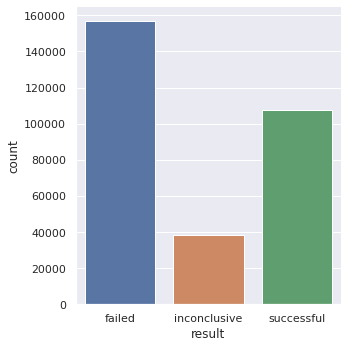

In [ ]:
#First, we check how many successful, inconclusive and failed projects are, compared with total projects
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(data = df, x ='result',kind = 'count')
print('percentage of each class')
print(df['result'].value_counts()/df['result'].count())

We can see that this dataset provides imbalanced classes as roughly half the number of projects failed while 35% succeeded and other 12% had an inconclusive result. Anyway, this imbalance between failed and successful is not that extreme.

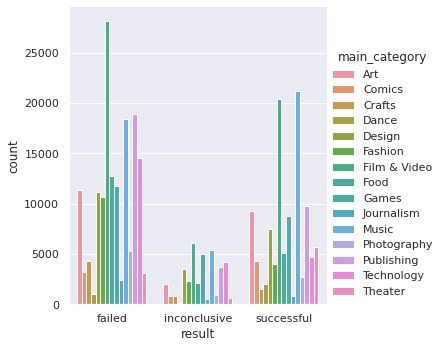

In [ ]:
# Next we want to know which main_category account for the most of 'failed', 'successful' and 'inconslusive' 
# and which got the least of those three result.
sns.catplot(data = df, x ='result',kind = 'count',hue = 'main_category')
plt.show()

We can see that during 2009 - 2016 (the year provided by dataset)

the top 3 rank of successful projects are in these main categories.
1. Music (> 20,000 projects)
2. Film & Video (> 20,000 projects)
3. Publishing (roughly 10,000 projects)

the 3 lowest rank of successful projects are in these main categories.
1. Journalism 
2. Crafts
3. Dance

the top 3 rank of failed projects are in these main categories.
1. Film & Video (> 25,000 projects)
2. Publishing (> 15,000 projects)
3. Music (> 15,000 projects)

the 3 lowest rank of failed projects are in these main categories.
1. Dance
2. Journalism
3. Theater

the top 3 rank of inconclusive successful projects are in these main categories.
1. Film & Video
2. Music
3. Games

the 3 lowest rank of inconslusive projects are in these main categories.

1. Dance
2. Journalism
3. Theater

Now, we know which main categories make up the 3 highest number (and also the 3 lowest) of successful, inconclusive and failed result.

However, this may not be useful as it's only tell the number of projects but not tells the successful rate as a percentage. (E.g. we can see that Music, Film & Video and Publishing also make up both the top 3 and the lowest 3 because these 3 categories may be the most 3 popular categories)

For this reason, next we would find the successful percentage among each main category, as we want to know the successful rate among each category.

In [ ]:
# create 2D frequency table first (crosstab)
count1 = pd.crosstab(df['main_category'],df['result'])

# then find the total numbers in each main category
count2 = df.groupby('main_category').count()
count2 = count2['id'].to_frame()

# merge them together
count = pd.merge(count1,count2,on='main_category', how = 'left')
count.rename(columns = {'id':'total'},inplace = True)

#divided count in each main category by total number so that we get the percentage
count['failed'] = count['failed']/count['total']
count['inconclusive'] = count['inconclusive']/count['total']
count['successful'] = count['successful']/count['total']

# drop 'total' column
count = count.drop(columns = ['total'])
count

,failed,inconclusive,successful
main_category,,,
Art,0.501129,0.090640,0.408232
Comics,0.388769,0.093713,0.517519
Crafts,0.646456,0.119457,0.234087
Dance,0.316605,0.051735,0.631660
Design,0.504993,0.157558,0.337449
Fashion,0.626882,0.136361,0.236757
Film & Video,0.514424,0.112135,0.373442
Food,0.638067,0.106736,0.255197
Games,0.459918,0.196351,0.343732


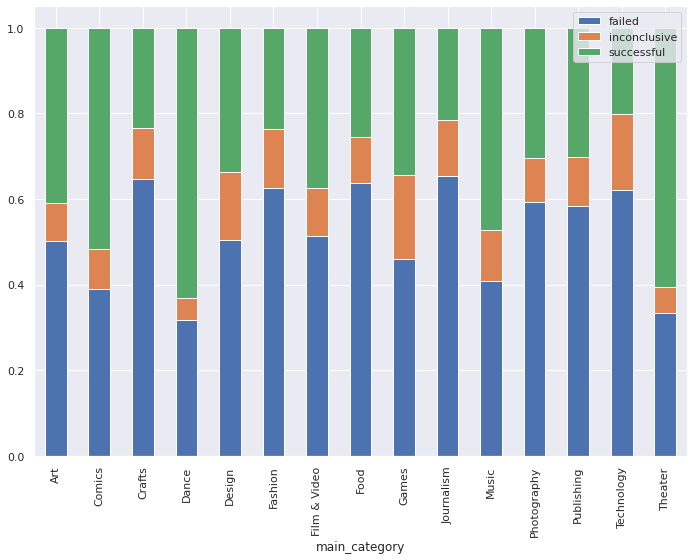

In [ ]:
# plot stacked bar chart
count.plot.bar(stacked = True)

Now, by the percentage point of view, we can clearly see that there are some outstanding main categories which have the high successful rate (> 60%) compared with others. They are **Crafts, Fashion, Food,Journalism and Technology** where as the main categories that have the low successful rate (<40%)are **Theater, Dance and Comic**.

Therefore, if you are a project owner in Crafts, Fashion, Food,Journalism or Technology main category ,who are looking for a fund. Luckily, you may have more chance to be successful in raising fund compared with those who are in other categories.

Anyway, this is not the only thing for sure, we will find out more about other factors.

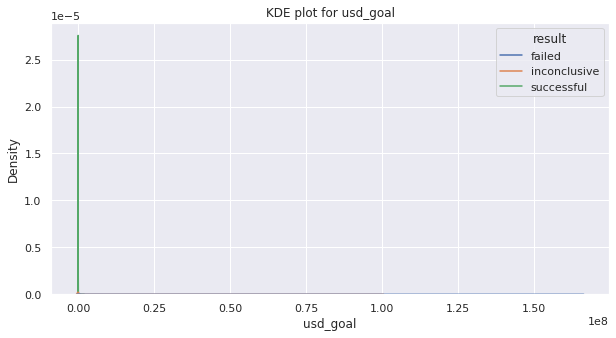

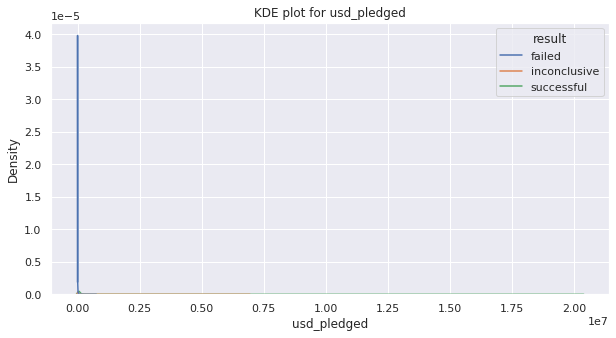

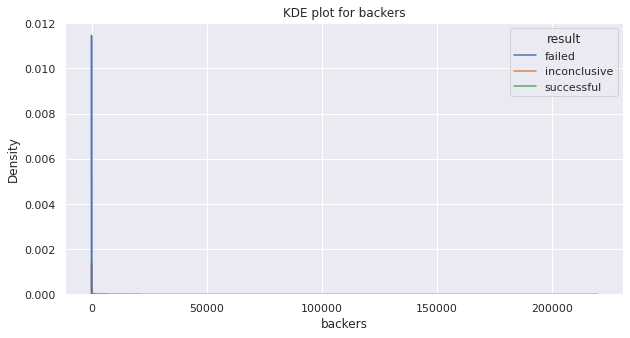

In [ ]:
# Now we check the distribution of some numerical columns using KDE and Box plot.
def kdeplot(df,x):
  plt.figure(figsize = (10,5))
  plt.title('KDE plot for {}'.format(x))
  ax0 = sns.kdeplot(data = df,x = x, label = x,hue = 'result')

kdeplot(df,'usd_goal')
kdeplot(df,'usd_pledged')
kdeplot(df,'backers')

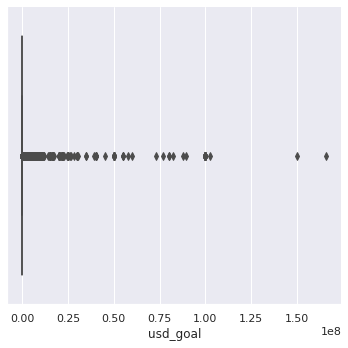

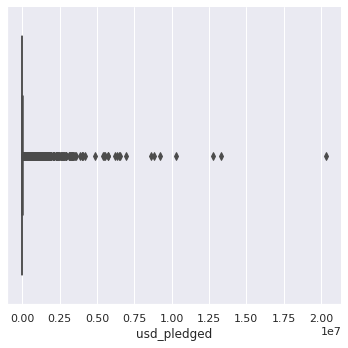

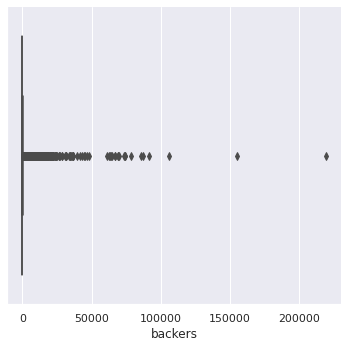

In [ ]:
sns.catplot(data = df,kind = 'box', x= 'usd_goal')
sns.catplot(data = df, kind = 'box', x = 'usd_pledged')
sns.catplot(data = df, kind = 'box', x = 'backers')

From KDE and box plot, we clearly see that the distribution in 'usd_pledged', 'usd_goal' and 'backers' columns are very positive skewed which means that there are quite many outliers (probably, the project which have a very high goal or get a very high pledged or have a massive number of backers). 

In this case, Median would be a better choice to represent the data in these columns because mean would be a bit excessive due to it is pulled by the outliers according to below figure (credit: wikipedia).

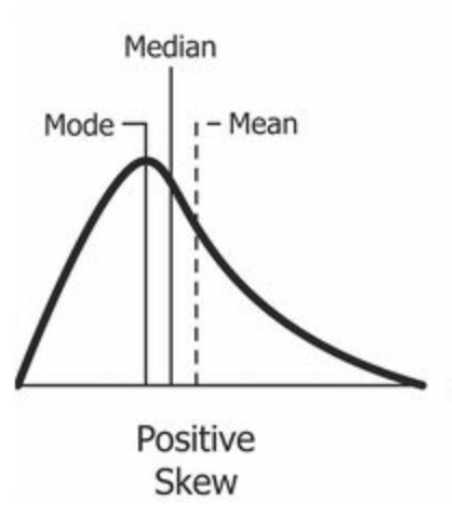

In [ ]:
print('Mean of usd_goal :',df['usd_goal'].mean())
print('Median of usd_goal :',df['usd_goal'].median())
print('Mode of usd_goal :',df['usd_goal'].mode())

print('\n')

print('Mean of usd_pledged :',df['usd_pledged'].mean())
print('Median of usd_pledged :',df['usd_pledged'].median())
print('Mode of usd_pledged :',df['usd_pledged'].mode())

print('\n')

print('Mean of backers :',df['backers'].mean())
print('Median of backers :',df['backers'].median())
print('Mode of backers :',df['backers'].mode())

Mean of usd_goal : 45128.061663612185
Median of usd_goal : 5215.123859191655
Mode of usd_goal : 0    5000.0
dtype: float64


Mean of usd_pledged : 8705.18513990434
Median of usd_pledged : 655.0
Mode of usd_pledged : 0    0.0
dtype: float64


Mean of backers : 104.13614840417272
Median of backers : 12.0
Mode of backers : 0    0.0
dtype: float64


We can see that value for median, mode and mean comply with the theory. (Mean is so high as it is pulled up by outliers) 

Therefore, from these statistical value we know that most projects are not funded due to mode (0 backers and 0 usd pledged) 
And if I have a project and want to be funded , my general expectation for pledged money would be 655 USD due to Median (I just expected for the middle value)

In [ ]:
df[df['usd_pledged']==0].count()
# 42017 projects got no pledged (13.88%) SO MANY !!

id                  42017
name                42017
category            42017
main_category       42017
currency            42017
deadline            42017
goal                42017
launched            42017
pledged             42017
state               42017
backers             42017
country             42017
usd_pledged         42017
usd_goal            42017
result              42017
duration            42017
name_length         42017
launched_year       42017
launched_month      42017
launched_weekday    42017
launched_date       42017
dtype: int64

In [ ]:
# As there are many outliers, we will just try to remove it with IQR method. and save it in another variable.
# because we just want to see the distribution of the value on those 3 columns

df_clean = df.copy()
cols = ['usd_pledged', 'usd_goal','backers'] # one or more

Q1 = df_clean[cols].quantile(0.25)
Q3 = df_clean[cols].quantile(0.75)
IQR = Q3 - Q1

df_clean = df_clean[~((df_clean[cols] < (Q1 - 1.5 * IQR)) |(df_clean[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean.head(3)

,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,country,usd_pledged,usd_goal,result,duration,name_length,launched_year,launched_month,launched_weekday,launched_date
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,...,GB,0.0,1531.393568,failed,58,31,2015,August,Tuesday,2015-08-11
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,...,US,1.0,5000.000000,failed,30,49,2012,March,Saturday,2012-03-17
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,...,US,1283.0,19500.000000,inconclusive,55,58,2015,July,Saturday,2015-07-04


In [ ]:
df_clean.info() #After removing outliers we got about % of the original data left

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227823 entries, 0 to 323730
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                227823 non-null  int64         
 1   name              227823 non-null  string        
 2   category          227823 non-null  category      
 3   main_category     227823 non-null  category      
 4   currency          227823 non-null  category      
 5   deadline          227823 non-null  datetime64[ns]
 6   goal              227823 non-null  float64       
 7   launched          227823 non-null  datetime64[ns]
 8   pledged           227823 non-null  float64       
 9   state             227823 non-null  category      
 10  backers           227823 non-null  float64       
 11  country           227823 non-null  category      
 12  usd_pledged       227823 non-null  float64       
 13  usd_goal          227823 non-null  float64       
 14  resu

After removing outliers due to IQR method on 'backers', 'usd_pledged' and 'usd_goal' as shown above, we can see that we only got 227,823 left (75% of cleaned data)

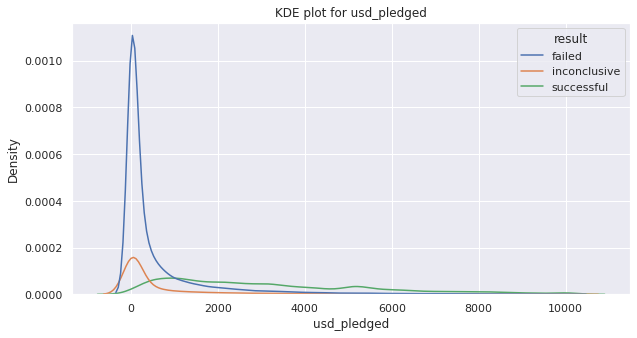

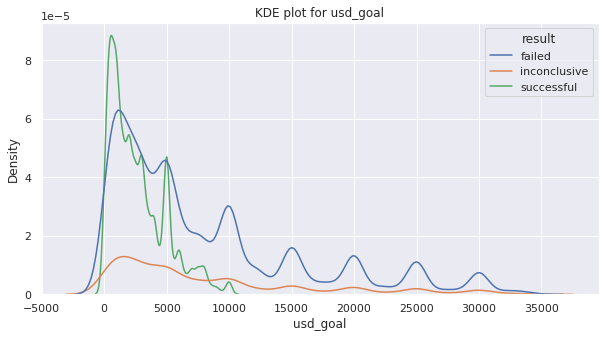

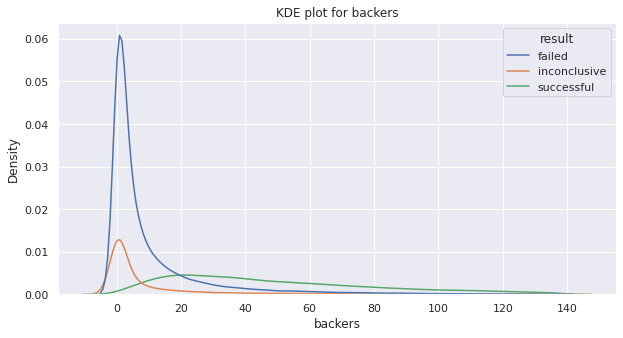

In [ ]:
kdeplot(df_clean, 'usd_pledged')
kdeplot(df_clean, 'usd_goal')
kdeplot(df_clean, 'backers')

However, now we can clearly see the distribution for each columns (backers, usd_pledged and usd_goal) and we notice that in the 'usd_goal' case there are a kind of wave in the distribution as the rounded numbers(E.g. 10000,15000,20000) tends to have more density than unrounded numbers(E.g. 12345) which makes sense as people want the rounded number of money (people usually are not that thorough E.g. if i aim to get the money exactly = 14895, i would just set the goal at 15000). 
Anyway, this case is not the same for backers and usd_pledged columns. However, they still got the same type of distribution which are positively skewed.

About the pledged amount, most projects got NO pledged (0 USD) and NO backers (0 supporter) while most projects have their pledged goal less than 5000 USD. 

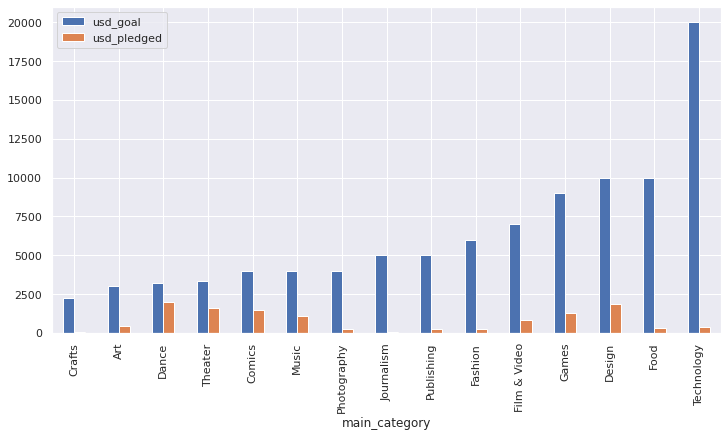

In [ ]:
# As we talk about goal and pledged. let's see which main categories set the highest usd_goal on average.
table = df.groupby('main_category')[['usd_goal','usd_pledged']].agg('median').sort_values(by='usd_goal')
table.plot(kind = 'bar', figsize=(12,6))

Overall, technology is the group with the highest usd goal followed by food and design while Crafts is the group with the lowest usd_goal.
It implies that projects in technology category may need much more money in order to bring the idea to life compared with projects in other categories.
On the other hand, projects in crafts category may need much less money to launch.

**Remarks: we compared figure by using Median as a representative not Mean.

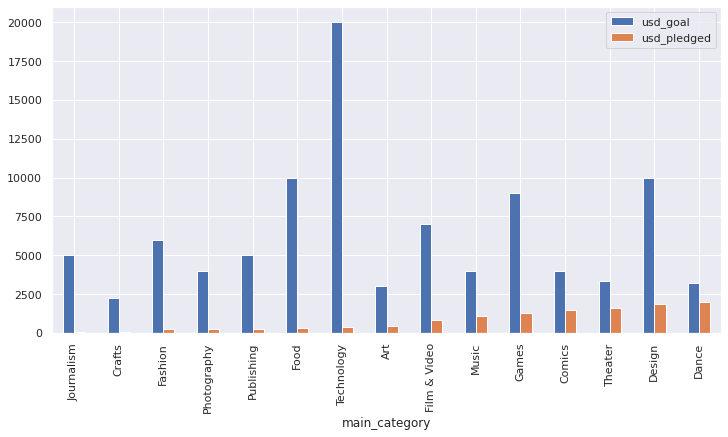

In [ ]:
#now, let's see which main categories got the highest pledged on average.
table = df.groupby('main_category')[['usd_goal','usd_pledged']].agg('median').sort_values(by='usd_pledged')
table.plot(kind = 'bar', figsize=(12,6))

Overall, Dance is the group which got the highest usd pledged followed by design and theater while Crafts and journalism are the group which got 0 pledged on average.
This probably reflect that the projects in Dance, Design and Theater may be more interesting (or seem to be more promising)in the supporters point of view compare with those in Journalism and Crafts categories.

**Remarks: we compared figure by using Median as a representative not Mean.

In [ ]:
# Now, we would try to find when would be the right time to launch the project.
# However, before we start we found that there are some outliers in launched time as some projects had a launched date in 1970
# which is beyond our scope of study, so we remove them
df_clean_groupby_date = df_clean.groupby('launched_date')[['usd_pledged','usd_goal']].sum()
df_clean_groupby_date 

,usd_pledged,usd_goal
launched_date,,
1970-01-01,0.000000,35200.000000
2009-04-21,625.000000,1000.000000
2009-04-24,35.000000,20.000000
2009-04-25,145.000000,99.000000
2009-04-27,387.000000,1900.000000
...,...,...
2016-12-02,72740.426673,625156.407405
2016-12-03,21403.732175,404510.921537
2016-12-04,15743.532252,385801.719580


In [ ]:
# remove the projects that were launched before 2009
df_clean = df_clean[df_clean['launched']>'2009']
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227817 entries, 0 to 323730
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                227817 non-null  int64         
 1   name              227817 non-null  string        
 2   category          227817 non-null  category      
 3   main_category     227817 non-null  category      
 4   currency          227817 non-null  category      
 5   deadline          227817 non-null  datetime64[ns]
 6   goal              227817 non-null  float64       
 7   launched          227817 non-null  datetime64[ns]
 8   pledged           227817 non-null  float64       
 9   state             227817 non-null  category      
 10  backers           227817 non-null  float64       
 11  country           227817 non-null  category      
 12  usd_pledged       227817 non-null  float64       
 13  usd_goal          227817 non-null  float64       
 14  resu

In [ ]:
# and also do the same for the original df (not just the df_clean)
df = df[df['launched']>'2009']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302627 entries, 0 to 323730
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                302627 non-null  int64         
 1   name              302627 non-null  string        
 2   category          302627 non-null  category      
 3   main_category     302627 non-null  category      
 4   currency          302627 non-null  category      
 5   deadline          302627 non-null  datetime64[ns]
 6   goal              302627 non-null  float64       
 7   launched          302627 non-null  datetime64[ns]
 8   pledged           302627 non-null  float64       
 9   state             302627 non-null  category      
 10  backers           302627 non-null  float64       
 11  country           302627 non-null  category      
 12  usd_pledged       302627 non-null  float64       
 13  usd_goal          302627 non-null  float64       
 14  resu

Then, we plot usd goal and usd pledged over time.

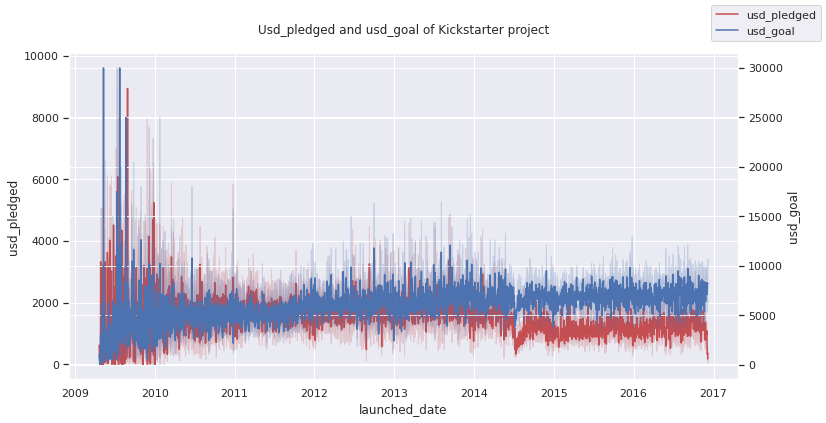

In [ ]:
def lineplot_2_twinx(df1,x1,y1,title,df2,y2):

  # Line Chart For usd_pledged and date
  fig, ax = plt.subplots(figsize=(12,6))
  plot = sns.lineplot(x=df1[x1], y=df1[y1], data=df1 ,color = 'r', 
                        label = '{}'.format(y1), legend=False)

  plt.ylabel('{}'.format(y1))
  plt.title(title, pad=20);

  # Line Chart For usd_goal and date
  ax2 = ax.twinx()
  plot2 = sns.lineplot(x=df2[x1], y=df2[y2], ax=ax2 ,data = df2 , color="b", 
                         label ='{}'.format(y2), legend=False) 

  plt.ylabel('{}'.format(y2))
  ax.figure.legend();

lineplot_2_twinx(df1 = df_clean,df2 = df_clean, x1 = 'launched_date',y1 ='usd_pledged', y2='usd_goal', 
                 title = 'Usd_pledged and usd_goal of Kickstarter project')

we found that plotting all dates may be too thorough and we cannot clearly see the main trend of the graph. Therefore, we redo the plot again but this time we sum up the usd goal and pledged amount for each year.

In [ ]:
df_clean_groupby_year = df_clean.groupby('launched_year')[['usd_pledged','usd_goal']].sum()
df_clean_groupby_year 

,usd_pledged,usd_goal
launched_year,,
2009,1.666824e+06,5.167999e+06
2010,1.518299e+07,4.641341e+07
2011,3.793182e+07,1.206633e+08
2012,5.456001e+07,1.975806e+08
2013,5.317787e+07,1.981031e+08
2014,5.671098e+07,2.989454e+08
2015,5.671421e+07,3.563279e+08
2016,4.311724e+07,2.441281e+08


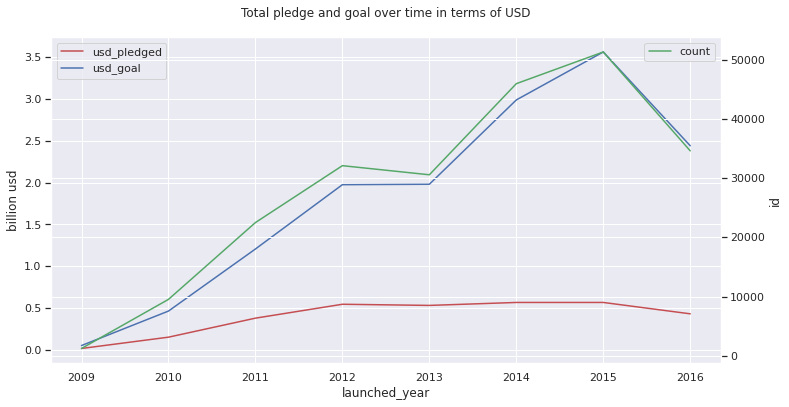

In [ ]:
# Line Chart For usd_pledged and date
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x=df_clean_groupby_year.index, y=df_clean_groupby_year['usd_pledged']/1e8, data=df_clean_groupby_year ,color = 'r', 
                        label = 'usd_pledged', legend=True)


# Line Chart For usd_goal and date
ax2 = ax
sns.lineplot(x=df_clean_groupby_year.index, y=df_clean_groupby_year['usd_goal']/1e8, ax=ax2,data = df_clean_groupby_year, color="b", 
                         label ='usd_goal', legend=True) 
plt.ylabel('billion usd')
plt.title('Total pledge and goal over time in terms of USD', pad=20);

# Line Chart For counting the number of projects for each year
ax3 = ax.twinx()
sns.lineplot(ax=ax3,data = df_clean.groupby('launched_year')['id'].count(), color="g", 
                         label ='count', legend=True)
plt.show();

Between 2009 and 2012, more kickstarter projects had been launched and the total project's pledge goal rose at the same rate (according to their similar slopes) while,the total amount of pledged money also increased at a lower rate (less slope size).

From 2012 to 2015, it is very interesting that the total amount of pledged money did not significantly change ,although there were a rise in numbers of Kickstarter projects, which associated with the increase in total project's pledge goal. (did not take a slight fall in 2013 into account).

This implies that during the time the pledged money per project was lower.
Perhaps, the new projects which were launched during this time were not attractive to supporters or during the time, the amount of pledged money reached its maximum level already (approximately 500 million USD) which means no matter how many attractive projects were launched, supporters would not afford them as they already gave all they could.

In 2016, The number of launched projects dropped dramatically but the total amount of pledged money just drop slightly. 

To be more specific, now let's see the rate of successful, failed and inconclusive projects as a percentage for each year. 

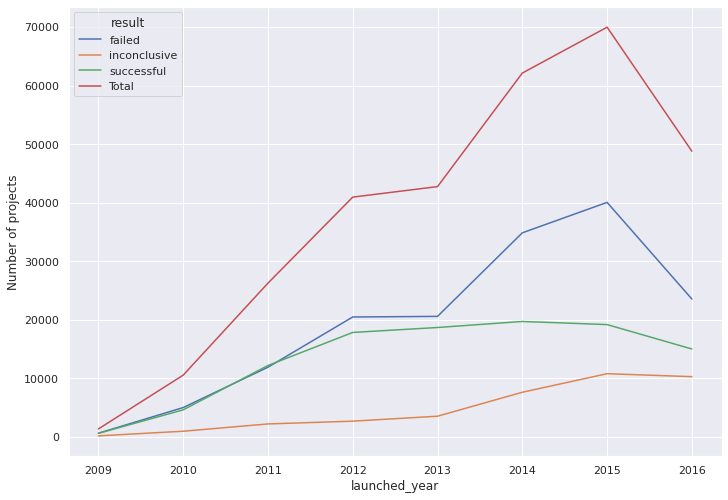

In [ ]:
ax = pd.crosstab(df['launched_year'],df['result']).plot.line()
ax.set_ylabel('Number of projects')
ax = df.groupby('launched_year')['id'].count().plot.line(label = 'Total',legend = True)
plt.show()


In [ ]:
def bar_result_pct(col_name):
  bar = pd.crosstab(df[col_name],df['result'])
  bar['total'] = bar['failed'] + bar['inconclusive'] + bar['successful']
  bar['successful%'] = bar['successful']/bar['total']
  bar['inconclusive%'] = bar['inconclusive']/bar['total']
  bar['failed%'] = bar['failed']/bar['total']
  bar = bar.drop(columns = ['failed','inconclusive','successful','total'])
  bar.plot.bar(stacked = True)

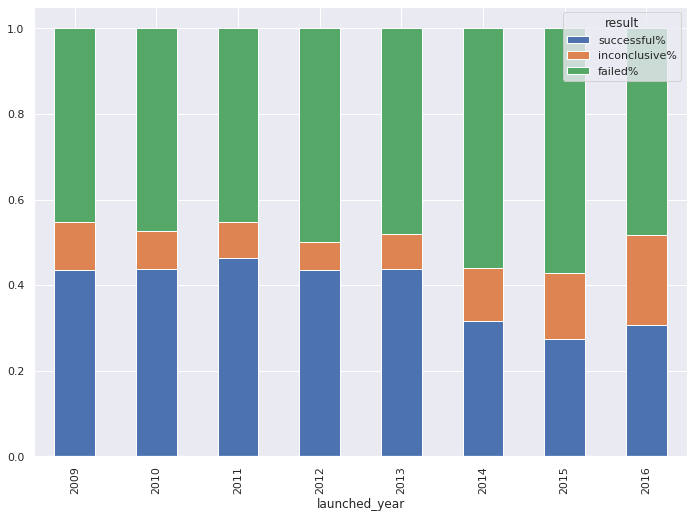

In [ ]:
bar_result_pct('launched_year')

Due to this dataset, we found that %successful of the projects is highest in 2011. In addition, we can see that from 2014 to 2016 successful rate of kickstarter projects fall significantly.

The number of inconclusive projects rose in 2016 because at that time there are many more projects which are still 'live' and as we include it in the inconclusive group so that is why inconclusive ratio increased in 2016.

This implies that projects which were launched before 2014 may have more probability to be successful than ones that launched from 2014 on.

Now, we extend this method to find the rate of successful, failed and inconclusive projects as a percentage for each month. 

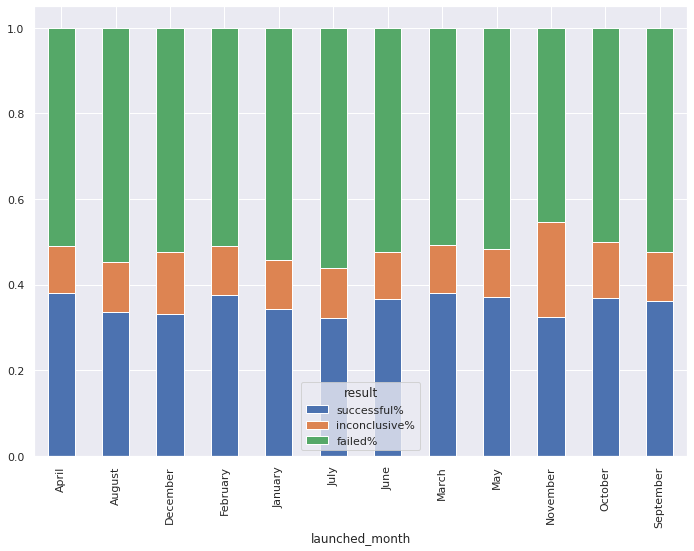

In [ ]:
ax = bar_result_pct('launched_month')

The past data showed that if you plan to launch your Kickstarter projects and think about which month should be the best, my recommendation in that from February to June would be a little better choices.

How about the rate of successful, failed and inconclusive projects as a percentage for each day of week?

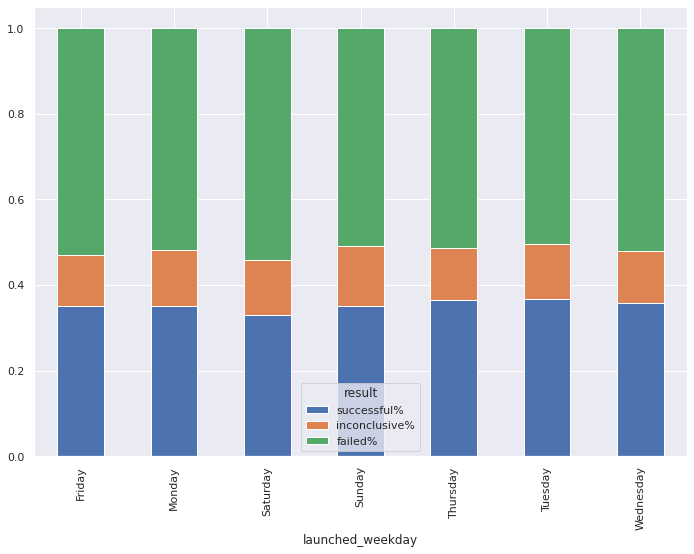

In [ ]:
bar_result_pct('launched_weekday')

Based on the data, we found that there was no significant different in successful probability among different launched months. Therefore, you can launched your projects from Monday to Sunday without a significant difference.

In [ ]:
# we may also want to know whether different launched time affect how successful the projects will be
# Therefore, we just check it.
df['launched_time'] = df['launched'].dt.hour
df.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,usd_pledged,usd_goal,result,duration,name_length,launched_year,launched_month,launched_weekday,launched_date,launched_time
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,...,0.0,1531.393568,failed,58,31,2015,August,Tuesday,2015-08-11,12
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,...,220.0,45000.000000,failed,45,14,2013,January,Saturday,2013-01-12,0
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,...,1.0,5000.000000,failed,30,49,2012,March,Saturday,2012-03-17,3


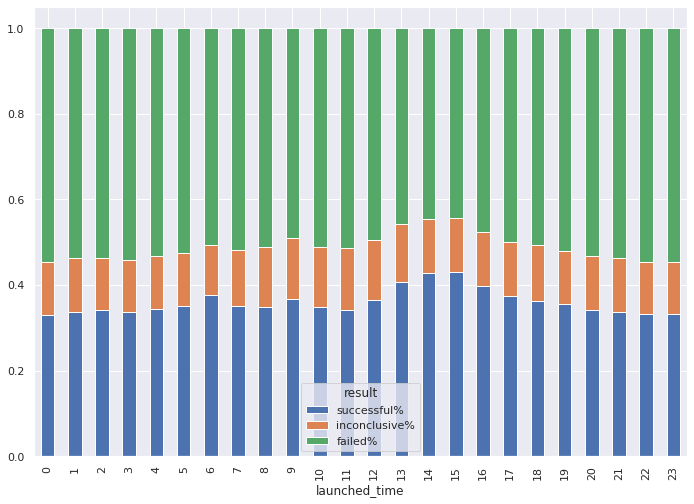

In [ ]:
bar_result_pct('launched_time')

As a result, we can clearly see that on this dataset basis, between 13.00 to 16.00 may be a good time to launch a kickstarter project as they have more than 40% successful rate.
Make sure to lauch it in an afternoon.

([<matplotlib.axis.XTick at 0x7f28440b2fd0>,
 <a list of 10 Text major ticklabel objects>)

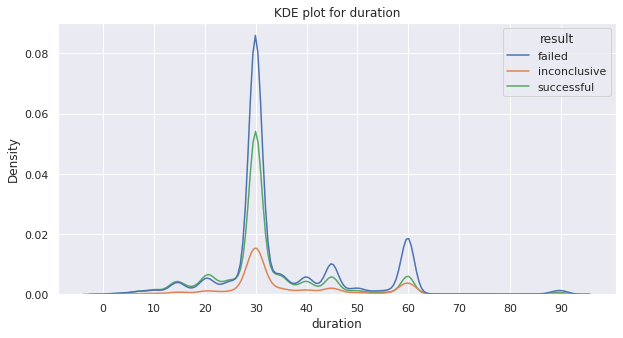

In [ ]:
# as we already talked about when would be a good launch time of kickstarter project
# now let's talk about how long active funding period we should set for a project.
# First, let's see what is the most popular duration, that project owners like to set.
ax = kdeplot(df, 'duration')
plt.xticks(np.arange(0,100,10))

We found that most projects set their active funding duration to be 30 days or 1 month. the second most popular period is 60 days or 2 months and the third is around 45 days or 1 and a half month.

([<matplotlib.axis.XTick at 0x7f284781d310>,
 <a list of 10 Text major ticklabel objects>)

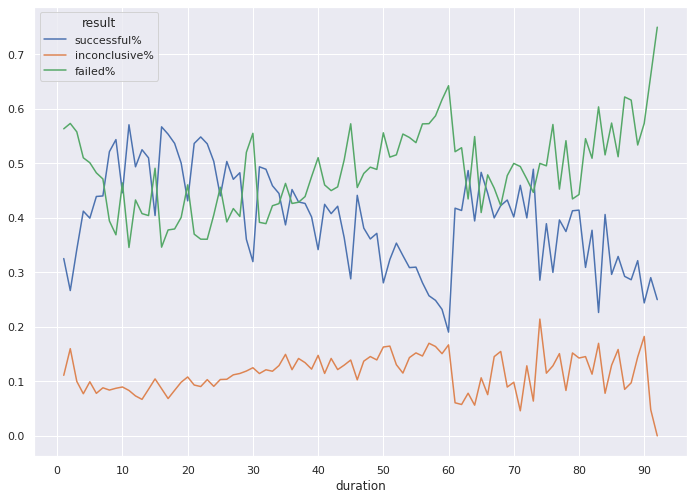

In [ ]:
# Now, let's see whether different active funding duration affect the result. 
def line_result_pct(col_name):
  line = pd.crosstab(df[col_name],df['result'])
  line['total'] = line['failed'] + line['inconclusive'] + line['successful']
  line['successful%'] = line['successful']/line['total']
  line['inconclusive%'] = line['inconclusive']/line['total']
  line['failed%'] = line['failed']/line['total']
  line = line.drop(columns = ['failed','inconclusive','successful','total'])
  line.plot.line()

line_result_pct('duration')
plt.xticks(np.arange(0,max(df['duration']),10))

we found that around 1 - 10 days of duration there is a clear trend that longer duration (closed to 10 days) causes the higher probability of success. However, what interesting is that after the 10 days-duration, the successful rate of projects drop gradually with some fluctuation.

In addition, the figure shows that after when the duration is set slightly over 60 days the successful rate goes up (more chance to be successful) again and then gradually decrease after that.

From this figure, what we got is that, 
1. Although we do not know the best exact duration for a project, but we do know that projects with 10 - 20 days or slightly over 60 days of duration had more successful rate than others setting duration. 
2. Duration more or less affects the successful rate of Kickstarter projects 

**Remarks: the successful rate drops at the popular number of duration (30,45 and 60) may be because there are many projects that were set to have the duration equal to those number and most of them were failed while only a few projects was set the duration at an unpopular number such as 20 or 15 days and those few projects are rather successful than failed. 

Don't forget that this is just based on this dataset and actually, duration is not the only factor affects the result of funding.
What's more important is that you set your duration to be appropriate with your goal. E.g. if you want 1000 USD, 10 days may be an appropriate time for you but if you want 1 million USD 10 days would not be appropriate.

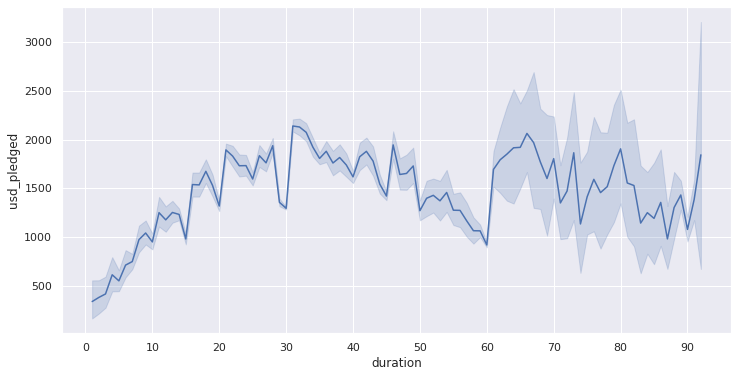

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
sns.lineplot(data = df_clean, x = 'duration',y = 'usd_pledged')
plt.xticks(np.arange(0,max(df['duration']),10))
plt.show()

In the amount of pledged money point of view, we can clearly see that the longer the duration is the more pledged money you would get (this is true when the duration is set less than 30 days) with more than 30 days of duration, more duration does not mean more pledged money anymore as the figure does not show an increasing trend anymore, instead it shows some fluctuation.

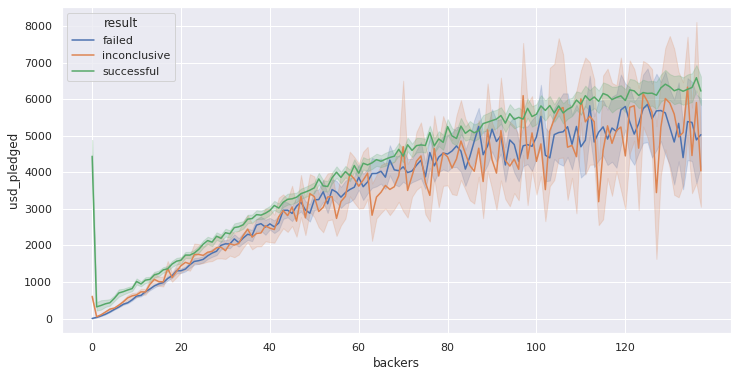

In [ ]:
# Now, lets see how different number of backers affect the usd_pledged
fig, ax = plt.subplots(figsize = (12,6))
sns.lineplot(data = df_clean, x = 'backers', y = 'usd_pledged', legend = True,hue='result')
plt.xticks(np.arange(0,max(df_clean['backers']),20))
plt.show()


We clearly see that more backers mean more amount of pledged money which is intuitive. The projects which have more supporters generally tends to get more pledged money.

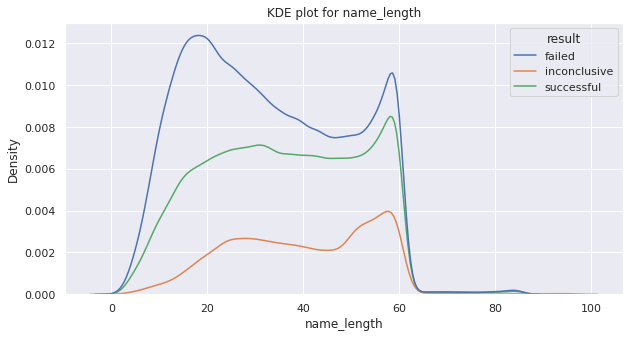

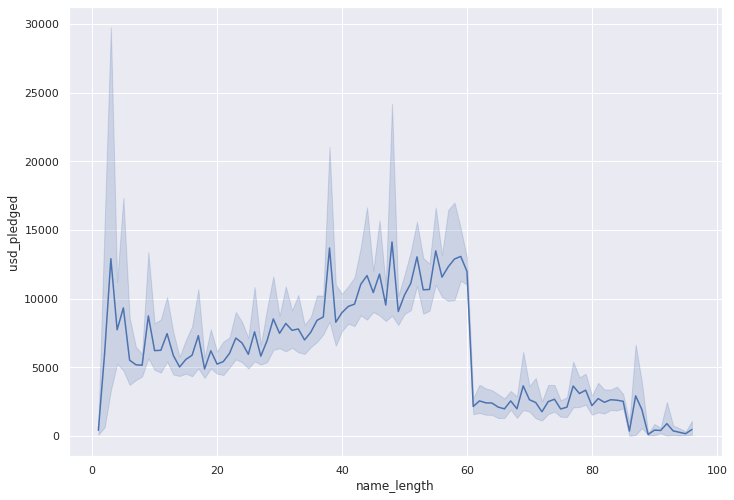

In [ ]:
# next let's talk about name length because nowadays people like the short but creative or catchy and informative name
# so, shorter name of the projects may be better??
# let's start by checking what is the most popular name length first.
# then, check whether the shorter name length is really better or not.

kdeplot(df, 'name_length')
plt.show()

sns.lineplot(data = df, y = 'usd_pledged', x='name_length')


Slightly less than 20 characters and slightly less than 60 characters seems to be the most popular name length and the second figure shows that the projects with name length less than 60 characters seem to get more pledged money than ones with more than 60 characters. (The project with more than 60 characters of its name may be too long!! )
Therefore, it may be better not to name your project more than 60 characters.

In [ ]:
# Next, let's see if different currency have different successful rate
# first let's see how many projects that ask for each currency first
df['currency'].value_counts()

USD             260795
GBP              18719
CAD               8125
EUR               7571
AUD               4277
SEK                873
NZD                789
DKK                548
NOK                358
CHF                301
MXN                125
SGD                 85
HKD                 61
Film & Video         0
Music                0
Name: currency, dtype: int64

Most projects were in US and want the pledged money in USD (very imbalanced). 

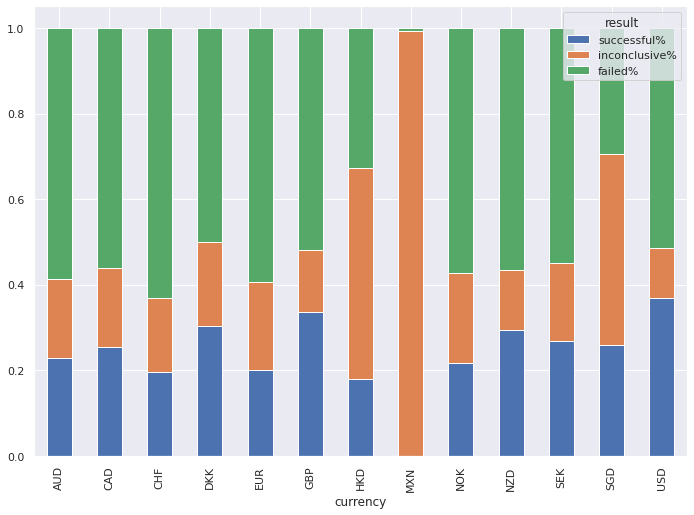

In [ ]:
bar_result_pct('currency')

Based on this dataset, we found that the projects launch in USD have the highest successful rate followed by GBP and DKK. Therefore, it probably is better to launched your Kickstarter project in the US. Anyway, don't forget this dataset is imbalanced.

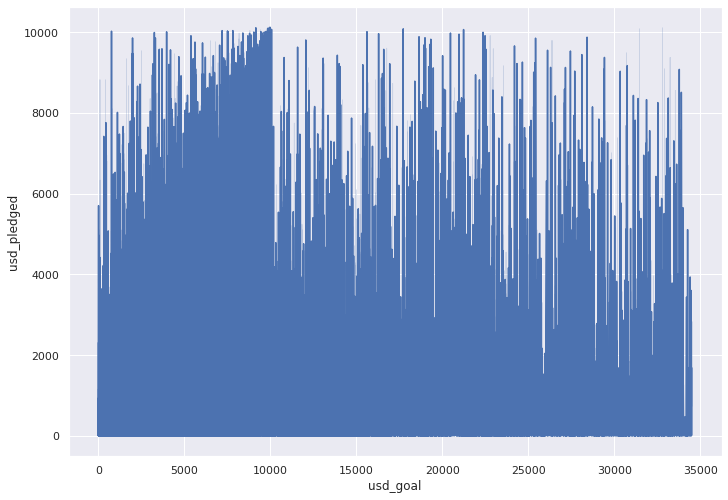

In [ ]:
# Another variable which should affects the result of crowdfunding is a goal.
# we think that higher the goal is the more difficult to be successful.
# So we check it.
# we decided to separate the data into bins to see the overall trends otherwise the graph may be too thorough as shown in below figure (this figure, we even used df_clean).
sns.lineplot(data = df_clean, x='usd_goal',y='usd_pledged')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


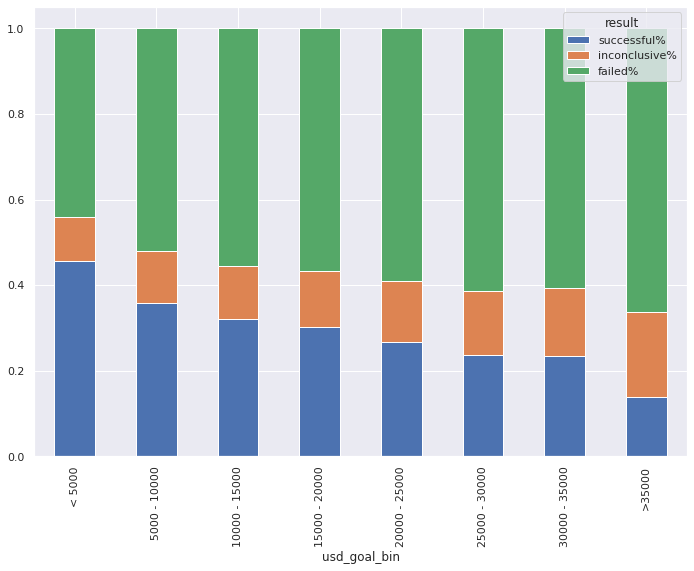

In [ ]:
conditions = [df['usd_goal'] < 5000,
              (df['usd_goal'] >= 5000)&(df['usd_goal'] < 10000),
              (df['usd_goal'] >= 10000)&(df['usd_goal'] < 15000),
              (df['usd_goal'] >= 15000)&(df['usd_goal'] < 20000),
              (df['usd_goal'] >= 20000)&(df['usd_goal'] < 25000),
              (df['usd_goal'] >= 25000)&(df['usd_goal'] < 30000),
              (df['usd_goal'] >= 30000)&(df['usd_goal'] < 35000),
              df['usd_goal'] >= 35000]
choices = ['< 5000','5000 - 10000','10000 - 15000','15000 - 20000',
           '20000 - 25000', '25000 - 30000','30000 - 35000', '>35000']

df['usd_goal_bin'] = np.select(conditions,choices)

bar = pd.crosstab(df['usd_goal_bin'],df['result'])
bar['total'] = bar['failed'] + bar['inconclusive'] + bar['successful']
bar['successful%'] = bar['successful']/bar['total']
bar['inconclusive%'] = bar['inconclusive']/bar['total']
bar['failed%'] = bar['failed']/bar['total']
bar = bar.drop(columns = ['failed','inconclusive','successful','total'])
bar.sort_values(by='successful%',ascending = False).plot.bar(stacked = True)

Obviously, our hypothesis is right that as the pledged goal is higher, the successful rate would be lower as it is more difficult to reach the higher goal.

After we have studied many aspects to find some insights from each feature(column) already, now we try to check the interaction among features, to check how much features depends on each others. 

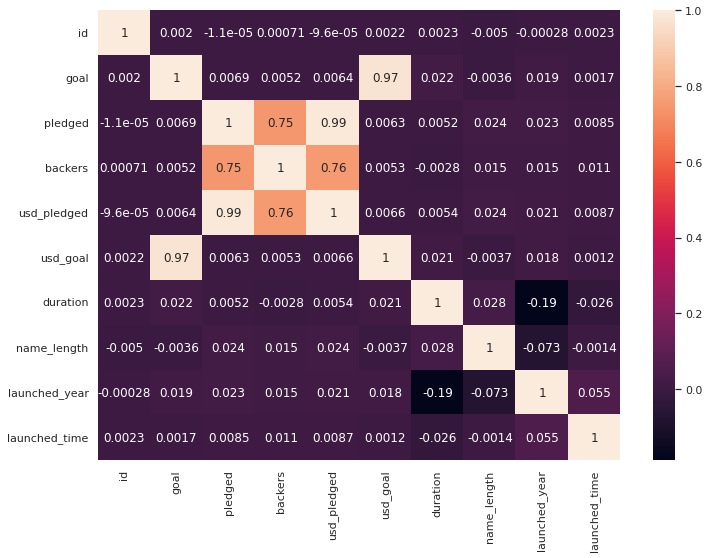

In [ ]:
# plot correlation heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

We can see that there is a higher correlation between goal-usd_goal, pledged-usd_pledged,backers-pledged and backers-usd_pledged which are not surprising as we already mentioned above that usd_pledged and usd_goal is just a conversion of pledged and goal column due to the exchange rate so that it's normal to be highly correlated. and about backers, there is a clear figure plotted above that shows linear relationship between backers and usd_pledged.

# **Save Dataset**
Because we do not want this notebook too long and we want to separate data cleaning process and machine learning process out, we decided to save the dataset and just import back in other notebook instead.

In [ ]:
df.to_csv('/content/drive/MyDrive/dataset/kickstarter_cleaned_dataset.csv', index = False)